In [1]:
#Importing the Libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split #for split the data
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

**1. Load the dataset (Churnprediction.csv).**

In [3]:
data= pd.read_csv("Churn_Prediction.csv")
data

,ID,CHURNRISK,GENDER,STATUS,CHILDREN,ESTINCOME,HOMEOWNER,AGE,TOTALDOLLARVALUETRADED,TOTALUNITSTRADED,LARGESTSINGLETRANSACTION,SMALLESTSINGLETRANSACTION,PERCENTCHANGECALCULATION,DAYSSINCELASTLOGIN,DAYSSINCELASTTRADE,NETREALIZEDGAINS_YTD,NETREALIZEDLOSSES_YTD
0,1703,Medium,NaN,M,2,28766.90,N,47,6110.61,58,1527.6525,152.76525,8.70,2,13,0.0000,152.76525
1,1704,Low,NaN,M,2,91272.20,Y,25,26992.70,13,13496.3500,1349.63500,3.25,4,10,1349.6350,0.00000
2,1705,Low,NaN,S,0,73228.30,N,42,22472.25,28,11236.1250,1123.61250,7.00,4,5,1123.6125,0.00000
3,1706,High,M,M,1,64792.30,N,52,13051.31,36,6525.6550,652.56550,9.00,3,6,0.0000,652.56550
4,1707,High,F,S,0,93322.10,Y,40,29922.99,8,14961.4950,1496.14950,2.00,4,9,0.0000,1496.14950
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,837,High,F,S,0,64319.20,N,41,3010.30,37,752.5750,75.25750,5.55,1,18,0.0000,150.51500
2062,838,Medium,F,S,1,73338.00,N,48,20922.09,9,10461.0450,1046.10450,2.25,1,9,0.0000,1046.10450
2063,839,Medium,F,S,0,433.74,N,61,3300.33,40,825.0825,82.50825,6.00,5,11,0.0000,82.50825
2064,840,Low,F,M,2,16962.20,N,45,18601.86,8,9300.9300,930.09300,2.00,1,5,930.0930,0.00000


**2. Drop columns that are not required for classification of Churn Risk.**

In [4]:
data = data.drop(['ID'], axis=1)

**3. If require perform data preprocessing.**

In [5]:
total = data.isnull().sum().sort_values(ascending=False)
percent_1 = data.isnull().sum()/data.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(10)

,Total,%
GENDER,3,0.1
NETREALIZEDLOSSES_YTD,0,0.0
NETREALIZEDGAINS_YTD,0,0.0
DAYSSINCELASTTRADE,0,0.0
DAYSSINCELASTLOGIN,0,0.0
PERCENTCHANGECALCULATION,0,0.0
SMALLESTSINGLETRANSACTION,0,0.0
LARGESTSINGLETRANSACTION,0,0.0
TOTALUNITSTRADED,0,0.0
TOTALDOLLARVALUETRADED,0,0.0


In [6]:
data.dropna(subset = ["GENDER"], inplace=True)

In [7]:
data['GENDER']=data['GENDER'].map({'M':1,'F':0})
data['STATUS']=data['STATUS'].map({'M':1,'S':0,'D':2})
data['CHURNRISK']=data['CHURNRISK'].map({'Medium':1,'Low':0,'High':2})
data['HOMEOWNER']=data['HOMEOWNER'].map({'Y':1,'N':0})

In [8]:
data.head()

,CHURNRISK,GENDER,STATUS,CHILDREN,ESTINCOME,HOMEOWNER,AGE,TOTALDOLLARVALUETRADED,TOTALUNITSTRADED,LARGESTSINGLETRANSACTION,SMALLESTSINGLETRANSACTION,PERCENTCHANGECALCULATION,DAYSSINCELASTLOGIN,DAYSSINCELASTTRADE,NETREALIZEDGAINS_YTD,NETREALIZEDLOSSES_YTD
3,2,1,1,1,64792.3,0,52,13051.31,36,6525.655,652.5655,9.00,3,6,0.0,652.5655
4,2,0,0,0,93322.1,1,40,29922.99,8,14961.495,1496.1495,2.00,4,9,0.0,1496.1495
5,2,1,1,2,49910.7,1,52,27422.74,23,13711.370,1371.1370,5.75,3,10,0.0,1371.1370
6,2,1,1,0,76161.4,1,45,11961.20,25,5980.600,598.0600,6.25,2,5,0.0,598.0600
7,2,0,1,2,55860.0,1,15,16011.60,10,8005.800,800.5800,2.50,2,8,0.0,800.5800


**4. Split dataset into test and train (20:80).**

In [9]:
y = data['CHURNRISK']
X = data.drop(['CHURNRISK'], axis=1).values 
X_train, X_test, y_train, y_test =  train_test_split(X,y,test_size = 0.2, random_state= 10)

**5. Build any three classification models for identifying Churn Risk.**

In [10]:
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models

[('LR', LogisticRegression(multi_class='ovr', solver='liblinear')),
 ('KNN', KNeighborsClassifier()),
 ('CART', DecisionTreeClassifier())]

In [11]:
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.949697 (0.010515)
KNN: 0.756364 (0.028658)
CART: 0.896970 (0.015804)


**6. Build Voting ensemble classifier on the training dataset.**

knn1 0.873 (0.030)
knn3 0.889 (0.038)
knn5 0.895 (0.031)
knn7 0.899 (0.035)
knn9 0.900 (0.033)
voting 0.902 (0.034)


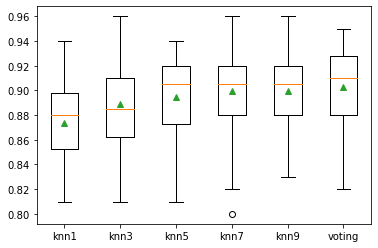

In [12]:
# compare hard voting to standalone classifiers
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from matplotlib import pyplot
%matplotlib inline
# get the dataset
def get_dataset():
    X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=2)
    return X, y

# get a voting ensemble of models
def get_voting():
    # define the base models
    models = list()
    models.append(('knn1', KNeighborsClassifier(n_neighbors=1)))
    models.append(('knn3', KNeighborsClassifier(n_neighbors=3)))
    models.append(('knn5', KNeighborsClassifier(n_neighbors=5)))
    models.append(('knn7', KNeighborsClassifier(n_neighbors=7)))
    models.append(('knn9', KNeighborsClassifier(n_neighbors=9)))
    # define the voting ensemble
    ensemble = VotingClassifier(estimators=models)
    return ensemble

# get a list of models to evaluate
def get_models():
    models = dict()
    models['knn1'] = KNeighborsClassifier(n_neighbors=1)
    models['knn3'] = KNeighborsClassifier(n_neighbors=3)
    models['knn5'] = KNeighborsClassifier(n_neighbors=5)
    models['knn7'] = KNeighborsClassifier(n_neighbors=7)
    models['knn9'] = KNeighborsClassifier(n_neighbors=9)
    models['voting'] = get_voting()
    return models

# evaluate a give model using cross-validation
def evaluate_model(model):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    return scores

# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model)
    results.append(scores)
    names.append(name)
    print('%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

**7. Build Bagging ensemble classifier on the training dataset.**

Building and Evaluating the Model

In [13]:
# Building Decision Tree
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion = 'entropy', random_state = 42)
dt.fit(X_train, y_train)
dt_pred_train = dt.predict(X_train)

In [14]:
from sklearn.metrics import f1_score
dt_pred_train = dt.predict(X_train)
print('Training Set Evaluation F1-Score: ',f1_score(y_train,dt_pred_train,average='micro'))

Training Set Evaluation F1-Score:  0.996969696969697


In [15]:
# Evaluating on Test set
dt_pred_test = dt.predict(X_test)
print('Testing Set Evaluation F1-Score: ',np.round(f1_score(y_test,dt_pred_test,average='micro'),3))

Testing Set Evaluation F1-Score:  0.918


Building a Random Forest Model

In [16]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(criterion = 'entropy', random_state = 42)
rfc.fit(X_train, y_train)

# Evaluating on Training set
rfc_pred_train = rfc.predict(X_train)
print('Training Set Evaluation F1-Score: ',f1_score(y_train,rfc_pred_train,average='micro'))

Training Set Evaluation F1-Score:  0.996969696969697


In [17]:
# Evaluating on Test set
rfc_pred_test = rfc.predict(X_test)
print('Testing Set Evaluation F1-Score: ',np.round(f1_score(y_test,rfc_pred_test,average='micro'),3))

Testing Set Evaluation F1-Score:  0.932


**8. Build Boosting ensemble classifier on the training dataset.**

In [18]:
import xgboost as xgb
import warnings
warnings.filterwarnings( "ignore" )
model=xgb.XGBClassifier(learning_rate=0.01,random_state=1)
model.fit(X_train, y_train)
model.score(X_test,y_test)

[21:39:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.9443099273607748

**9. Fit the models designed from step-5 to step-8 on the test dataset.**

In [19]:
logmodel = LogisticRegression()
logmodel.fit(X_test,y_test)

LogisticRegression()

In [20]:
KNmodel = KNeighborsClassifier()
KNmodel.fit(X_test,y_test)

KNeighborsClassifier()

In [21]:
Dmodel = DecisionTreeClassifier()
Dmodel.fit(X_test,y_test)

DecisionTreeClassifier()

In [22]:
RFmodel = RandomForestClassifier()
RFmodel.fit(X_test,y_test)

RandomForestClassifier()

**10. Evaluate the designed models from step-5 to step-8 with appropriate classification metrics.**

In [23]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [24]:
predictions = logmodel.predict(X_test)
accuracy=confusion_matrix(y_test,predictions)
print(accuracy)
print(classification_report(y_test,predictions))

[[141   0   0]
 [  6  60  15]
 [  0   0 191]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       141
           1       1.00      0.74      0.85        81
           2       0.93      1.00      0.96       191

    accuracy                           0.95       413
   macro avg       0.96      0.91      0.93       413
weighted avg       0.95      0.95      0.95       413



In [25]:
predictions = KNmodel.predict(X_test)
accuracy=confusion_matrix(y_test,predictions)
print(accuracy)
print(classification_report(y_test,predictions))

[[116   0  25]
 [ 13  43  25]
 [ 34  18 139]]
              precision    recall  f1-score   support

           0       0.71      0.82      0.76       141
           1       0.70      0.53      0.61        81
           2       0.74      0.73      0.73       191

    accuracy                           0.72       413
   macro avg       0.72      0.69      0.70       413
weighted avg       0.72      0.72      0.72       413



In [26]:
predictions = Dmodel.predict(X_test)
accuracy=confusion_matrix(y_test,predictions)
print(accuracy)
print(classification_report(y_test,predictions))

[[141   0   0]
 [  0  81   0]
 [  0   0 191]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       141
           1       1.00      1.00      1.00        81
           2       1.00      1.00      1.00       191

    accuracy                           1.00       413
   macro avg       1.00      1.00      1.00       413
weighted avg       1.00      1.00      1.00       413



In [27]:
predictions = RFmodel.predict(X_test)
accuracy=confusion_matrix(y_test,predictions)
print(accuracy)
print(classification_report(y_test,predictions))

[[141   0   0]
 [  0  81   0]
 [  0   0 191]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       141
           1       1.00      1.00      1.00        81
           2       1.00      1.00      1.00       191

    accuracy                           1.00       413
   macro avg       1.00      1.00      1.00       413
weighted avg       1.00      1.00      1.00       413

